In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [3]:
#create new lists to store api data
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [4]:
#API calls
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : faanui
Processing Record 2 of Set 1 : bethel
Processing Record 3 of Set 1 : saldanha
Processing Record 4 of Set 1 : sweetwater
Processing Record 5 of Set 1 : busselton
Processing Record 6 of Set 1 : ginir
Processing Record 7 of Set 1 : bubaque
Processing Record 8 of Set 1 : chokurdakh
Processing Record 9 of Set 1 : hobart
City not found. Skipping...
Processing Record 10 of Set 1 : puerto ayora
Processing Record 11 of Set 1 : lorengau
Processing Record 12 of Set 1 : georgetown
Processing Record 13 of Set 1 : punta arenas
Processing Record 14 of Set 1 : padang
Processing Record 15 of Set 1 : mildura
Processing Record 16 of Set 1 : hilo
Processing Record 17 of Set 1 : kodiak
Processing Record 18 of Set 1 : russell
Processing Record 19 of Set 1 : rikitea
Processing Record 20 of Set 1 : penzance
Processing Record 21 of Set 1 : kahului
Processing Record 22 of Set 1 : ushuaia
Processing Record 23 of Set 1 :

Processing Record 32 of Set 4 : tommerup
Processing Record 33 of Set 4 : kvitok
Processing Record 34 of Set 4 : tsuruoka
Processing Record 35 of Set 4 : uvalde
Processing Record 36 of Set 4 : qaqortoq
Processing Record 37 of Set 4 : cananeia
City not found. Skipping...
Processing Record 38 of Set 4 : nalut
City not found. Skipping...
Processing Record 39 of Set 4 : hit
Processing Record 40 of Set 4 : sao joao da barra
Processing Record 41 of Set 4 : coihaique
Processing Record 42 of Set 4 : vila velha
Processing Record 43 of Set 4 : atar
Processing Record 44 of Set 4 : minas novas
Processing Record 45 of Set 4 : sorland
Processing Record 46 of Set 4 : podosinovets
Processing Record 47 of Set 4 : kununurra
Processing Record 48 of Set 4 : daru
Processing Record 49 of Set 4 : torbay
Processing Record 50 of Set 4 : kibala
Processing Record 0 of Set 5 : laguna
Processing Record 1 of Set 5 : norman wells
Processing Record 2 of Set 5 : lomovka
Processing Record 3 of Set 5 : ucluelet
City not 

Processing Record 15 of Set 8 : nouadhibou
Processing Record 16 of Set 8 : gladstone
Processing Record 17 of Set 8 : touros
Processing Record 18 of Set 8 : college
Processing Record 19 of Set 8 : povenets
City not found. Skipping...
Processing Record 20 of Set 8 : broome
Processing Record 21 of Set 8 : gympie
Processing Record 22 of Set 8 : hammerfest
Processing Record 23 of Set 8 : port hardy
Processing Record 24 of Set 8 : lazaro cardenas
Processing Record 25 of Set 8 : joppatowne
Processing Record 26 of Set 8 : morant bay
Processing Record 27 of Set 8 : menongue
Processing Record 28 of Set 8 : tura
Processing Record 29 of Set 8 : aykhal
Processing Record 30 of Set 8 : dholka
Processing Record 31 of Set 8 : noumea
Processing Record 32 of Set 8 : dunedin
Processing Record 33 of Set 8 : seoul
Processing Record 34 of Set 8 : flin flon
Processing Record 35 of Set 8 : makakilo city
Processing Record 36 of Set 8 : amapa
Processing Record 37 of Set 8 : burnie
Processing Record 38 of Set 8 :

Processing Record 47 of Set 11 : ilmenau
-----------------------------
Data Retrieval Complete
-----------------------------


In [70]:
city_df = pd.DataFrame({"City":city_name_list,
    "Cloudiness":cloudiness_list,
    "Country":country_list,
    "Date":date_list,
    "Humidity":humidity_list,
    "Lat":lat_list,
    "Lng":lng_list,
    "Temp":max_temp_list,
    "Wind Speed":wind_speed_list})

#export to csv
city_df.to_csv("output_data/../output_data_file")



FileNotFoundError: [Errno 2] No such file or directory: 'output_data/../output_data_file'

In [13]:
#check to see if there are any cities where humidity is greater than 100
#by sorting values in humidity column
city_df.sort_values(["Humidity"], axis = 0, ascending=False)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temp,Wind Speed
233,Kysyl-Syr,98,RU,1644773076,100,63.8986,122.7617,-25.37,0.83
238,Verkhnevilyuysk,98,RU,1644773078,100,63.4453,120.3167,-18.40,1.72
181,Campbell River,75,CA,1644773061,100,50.0163,-125.2446,38.26,0.00
403,Zabaykal'sk,56,RU,1644773127,100,49.6333,117.3167,-20.81,4.38
525,Manado,40,ID,1644773163,100,1.4870,124.8455,74.17,1.14
...,...,...,...,...,...,...,...,...,...
444,Kérouané,51,GN,1644773140,9,9.2667,-9.0167,93.27,5.37
328,Koubia,1,GN,1644773105,8,11.5833,-11.9000,89.51,3.74
495,Yaan,18,NG,1644773155,8,7.3833,8.5667,97.45,5.48
177,Ferkessédougou,10,CI,1644773060,7,9.6000,-5.2000,96.44,4.36


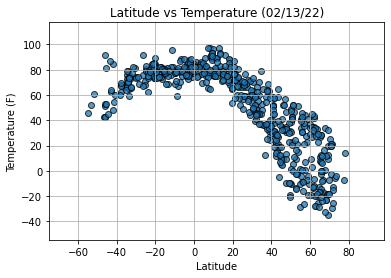

In [17]:
plt.scatter(city_df['Lat'],city_df['Temp'],alpha=0.75,edgecolors='black')
plt.title(f"Latitude vs Temperature ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Temperature (F)')
plt.xlim(min(city_df['Lat'])-20,max(city_df['Lat'])+20)
plt.ylim(min(city_df['Temp'])-20,max(city_df['Temp'])+20)
plt.grid()
plt.savefig("lat_vs_temp.png")

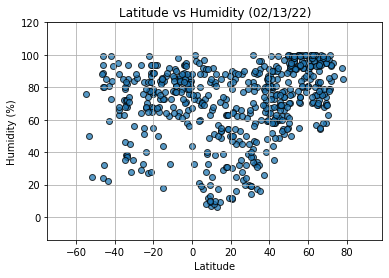

In [19]:
plt.scatter(city_df['Lat'],city_df['Humidity'],alpha=0.75,edgecolors='black')
plt.title(f"Latitude vs Humidity ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Humidity (%)')
plt.xlim(min(city_df['Lat'])-20,max(city_df['Lat'])+20)
plt.ylim(min(city_df['Humidity'])-20,max(city_df['Humidity'])+20)
plt.grid()
plt.savefig("lat_vs_humidity.png")

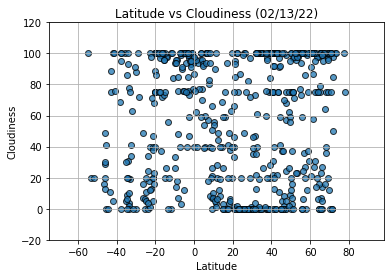

In [20]:
plt.scatter(city_df['Lat'],city_df['Cloudiness'],alpha=0.75,edgecolors='black')
plt.title(f"Latitude vs Cloudiness ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Cloudiness')
plt.xlim(min(city_df['Lat'])-20,max(city_df['Lat'])+20)
plt.ylim(min(city_df['Cloudiness'])-20,max(city_df['Cloudiness'])+20)
plt.grid()
plt.savefig("lat_vs_cloudiness.png")

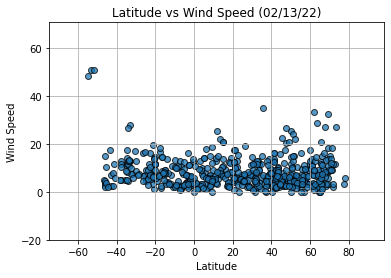

In [21]:
plt.scatter(city_df['Lat'],city_df['Wind Speed'],alpha=0.75,edgecolors='black')
plt.title(f"Latitude vs Wind Speed ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Wind Speed')
plt.xlim(min(city_df['Lat'])-20,max(city_df['Lat'])+20)
plt.ylim(min(city_df['Wind Speed'])-20,max(city_df['Wind Speed'])+20)
plt.grid()
plt.savefig("lat_vs_wind.png")

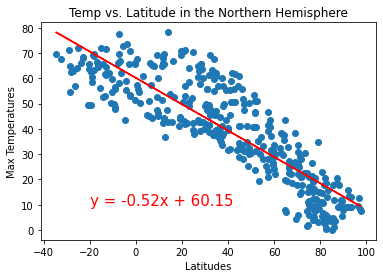

In [23]:
north = city_df.loc[city_df["Lat"] >= 0]
south = city_df.loc[city_df["Lat"] < 0]

x_values = north['Temp']
y_values = north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.title("Temp vs. Latitude in the Northern Hemisphere")
plt.ylabel('Max Temperatures')
plt.xlabel('Latitudes')
plt.show()


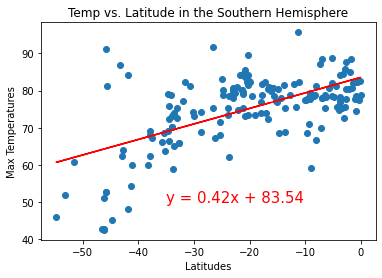

In [67]:
y_values = south['Temp']
x_values = south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,50),fontsize=15,color="red")
plt.title("Temp vs. Latitude in the Southern Hemisphere")
plt.ylabel('Max Temperatures')
plt.xlabel('Latitudes')
plt.show()

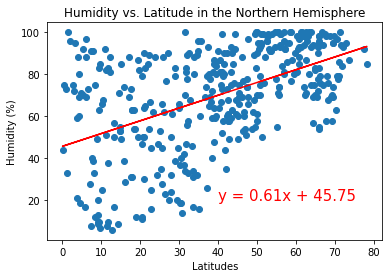

In [64]:
y_values = north['Humidity']
x_values = north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title("Humidity vs. Latitude in the Northern Hemisphere")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitudes')
plt.show()

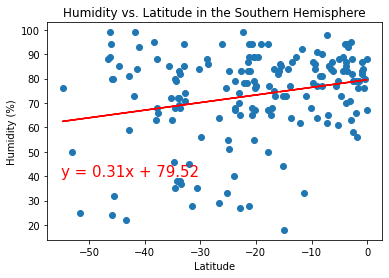

In [62]:
y_values = south['Humidity']
x_values = south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.title("Humidity vs. Latitude in the Southern Hemisphere")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.show()

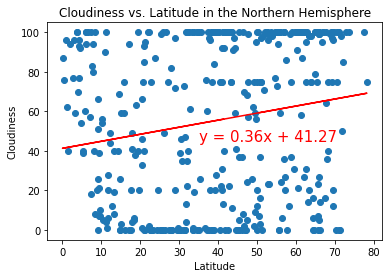

In [60]:
y_values = north['Cloudiness']
x_values = north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,45),fontsize=15,color="red")
plt.title("Cloudiness vs. Latitude in the Northern Hemisphere")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.show()


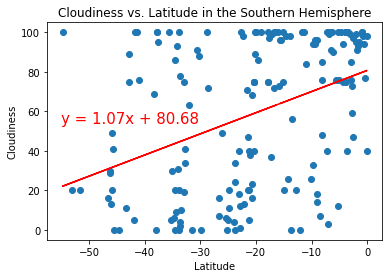

In [57]:
y_values = south['Cloudiness']
x_values = south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 54),fontsize=15,color="red")
plt.title("Cloudiness vs. Latitude in the Southern Hemisphere")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.show()


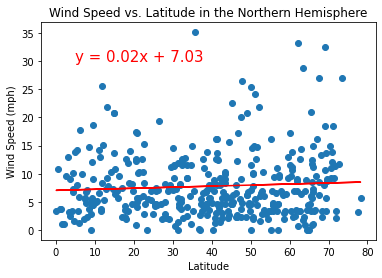

In [52]:
y_values = north['Wind Speed']
x_values = north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.title("Wind Speed vs. Latitude in the Northern Hemisphere")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.show()

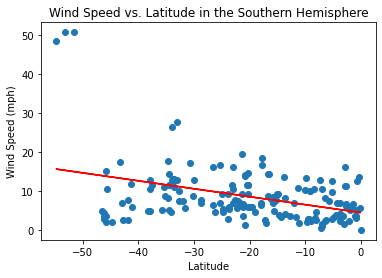

In [50]:
y_values = south['Wind Speed']
x_values = south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(27,-5),fontsize=15,color="red")
plt.title("Wind Speed vs. Latitude in the Southern Hemisphere")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.show()